In [99]:
'''
Intro: In the following series of cells I will explore atlas data to compare GDP around the world. 
I will be paying particular attention to Nations that have pledged themselves to China's One Belt, One Road Initiative,
also known as the Belt and Road Initiative (BRI), by signing what is refered to as an official Memorandum of Understanding.

Furthermore, I will be comparing nations that were rated poorly on the 2019 World justice Project Rule of Law index 
as well as the AI Global Surveillance Index to draw comparisons and derive insights.

Predictions: I predict that Nations ranked poorly on these two indeces are also likely to be authoritatian regimes that
are subscribing to oppressive surveillance meausures using technology acquired as part of the Belt and Road Initiative
'''

"\nIntro: In the following series of cells I will explore atlas data to compare GDP around the world. \nI will be paying particular attention to Nations that have pledged themselves to China's One Belt, One Road Initiative,\nalso known as the Belt and Road Initiative (BRI), by signing what is refered to as an official Memorandum of Understanding.\n\nFurthermore, I will be comparing nations that were rated poorly on the 2019 World justice Project Rule of Law index \nas well as the AI Global Surveillance Index to draw comparisons and derive insights.\n\nPredictions: I predict that Nations ranked poorly on these two indeces are also likely to be authoritatian regimes that\nare subscribing to oppressive surveillance meausures using technology acquired as part of the Belt and Road Initiative\n"

In [100]:
# Import libraries
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
atlas_result = requests.get("https://www.worldatlas.com/aatlas/ctycodes.htm")

### HTML Data Exploration: World Atlas Data ###

In [102]:
# Status: Successful
print(atlas_result.status_code)

200


In [103]:
print(atlas_result.headers)

{'Server': 'nginx/1.13.12', 'Date': 'Wed, 19 Aug 2020 18:11:38 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Powered-By': 'PHP/7.3.5', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-Frame-Options': 'SAMEORIGIN', 'Content-Encoding': 'gzip'}


In [104]:
atlas_src = atlas_result.content

In [105]:
print(atlas_src)

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n    \n            <title>2-Letter, 3-Letter, Country Codes for All Countries in the World</title>        <meta charset="utf-8">\n<meta name="description" content="2-letter country codes, 3-letter country codes and a world atlas of facts flags and maps including every continent, country, dependency, exotic destination, island, major city, ocean, province, state &amp; territory on the planet!" >\n        <meta property="fb:app_id" content="1534891833401557">\n        <meta property="fb:admins" content="518129666">\n        <meta property="fb:admins" content="100004698243421">\n        <meta property="fb:pages" content="150031197968">\n        <meta name="viewport" content="width=device-width, initial-scale=1">\n        <meta name="msvalidate.01" content="88D149050818A728069F2C509B73C38B" />\n        \n                \n                \n        <link rel="preload" href="/javascript/lazyLoading.min.js" as="script">\n        <link rel="preload" 

In [106]:
atlas_soup = BeautifulSoup(atlas_src, "lxml")

In [107]:
atlas_tables = atlas_soup.find_all("table")

In [108]:
# Table Contents
tbody = atlas_soup.find_all("tbody")

In [109]:
# View of the individual row elements in the countries table
for tr in tbody:
    for td in tr:
        if type(td) == bs4.element.Tag:
            print(td.text)
    print('\n')

 COUNTRY A2 (ISO) A3 (UN) NUM (UN) DIALING CODE 
 Afghanistan AF AFG 4 93 
 Albania AL ALB 8 355 
 Algeria DZ DZA 12 213 
 American Samoa AS ASM 16 1-684 
 Andorra AD AND 20 376 
 Angola AO AGO 24 244 
 Anguilla AI AIA 660 1-264 
 Antarctica AQ ATA 10 672 
 Antigua and Barbuda AG ATG 28 1-268 
 Argentina AR ARG 32 54 
 Armenia AM ARM 51 374 
 Aruba AW ABW 533 297 
 Australia AU AUS 36 61 
 Austria AT AUT 40 43 
 Azerbaijan AZ AZE 31 994 
 Bahamas BS BHS 44 1-242 
 Bahrain BH BHR 48 973 
 Bangladesh BD BGD 50 880 
 Barbados BB BRB 52 1-246 
 Belarus BY BLR 112 375 
 Belgium BE BEL 56 32 
 Belize BZ BLZ 84 501 
 Benin BJ BEN 204 229 
 Bermuda BM BMU 60 1-441 
 Bhutan BT BTN 64 975 
 Bolivia BO BOL 68 591 
 Bonaire BQ BES 535 599 
 Bosnia and Herzegovina BA BIH 70 387 
 Botswana BW BWA 72 267 
 Bouvet Island BV BVT 74 47 
 Brazil BR BRA 76 55 
 British Indian Ocean Territory IO IOT 86 246 
 Brunei Darussalam BN BRN 96 673 
 Bulgaria BG BGR 100 359 
 Burkina Faso BF BFA 854 226 
 Burundi B

In [110]:
# Placing table contents from atlas_soup into a Pandas DataFrame
atlas_df = pd.read_html(str(atlas_tables), header=0)[0]

In [111]:
# Taking a peak at the data 
atlas_df.head()

,COUNTRY,A2 (ISO),A3 (UN),NUM (UN),DIALING CODE
0,Afghanistan,AF,AFG,4,93
1,Albania,AL,ALB,8,355
2,Algeria,DZ,DZA,12,213
3,American Samoa,AS,ASM,16,1-684
4,Andorra,AD,AND,20,376


In [112]:
# Eliminating Unnecessary columns
atlas_df.drop(columns=['A2 (ISO)','A3 (UN)','NUM (UN)','DIALING CODE'], inplace=True)

In [113]:
# Atlas Final
atlas_df.head()

,COUNTRY
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra


In [114]:
# Saving for later use
atlas_df.to_excel('data/atlas_countries_and_codes.xlsx', index=False)

### Second Serving of Soup Data: ###

In [115]:
# New Soup - BRI countries
# Primary Source (In Chinese): https://www.yidaiyilu.gov.cn/info/iList.jsp?tm_id=126&cat_id=10122&info_id=77298
bri_result = requests.get("https://green-bri.org/countries-of-the-belt-and-road-initiative-bri") # secondary source
bri_src = bri_result.content
bri_soup = BeautifulSoup(bri_src, 'lxml')

In [116]:
# honing in on our data
bri_tables = bri_soup.find_all("table")

In [117]:
bri_df = pd.read_html(str(bri_tables), header=0)[0]

In [118]:
# Quick Peak at the last 5 rows in the table
bri_df.tail()

,Country,Region,IncomeGroup
133,"Venezuela, RB",Latin America & Caribbean,Upper middle income
134,Vietnam,East Asia & Pacific,Lower middle income
135,"Yemen, Rep.",Middle East & North Africa,Low income
136,Zambia,Sub-Saharan Africa,Lower middle income
137,Zimbabwe,Sub-Saharan Africa,Low income


In [119]:
# Preparing Histogram
num_bins=len(bri_df['Region'].unique())
num_bins

6

<AxesSubplot:xlabel='Region,IncomeGroup'>

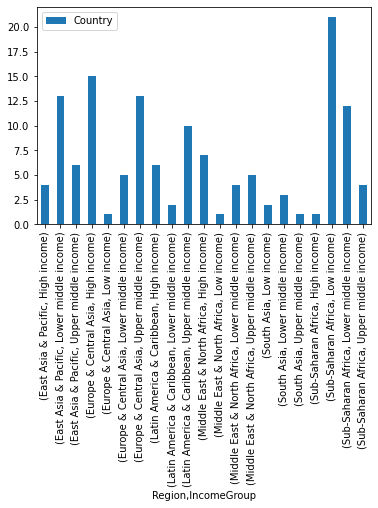

In [120]:
# Sorted by Region, subdivided by income group
bri_df.groupby(['Region','IncomeGroup']).count().plot(kind='bar')

<AxesSubplot:xlabel='IncomeGroup,Region'>

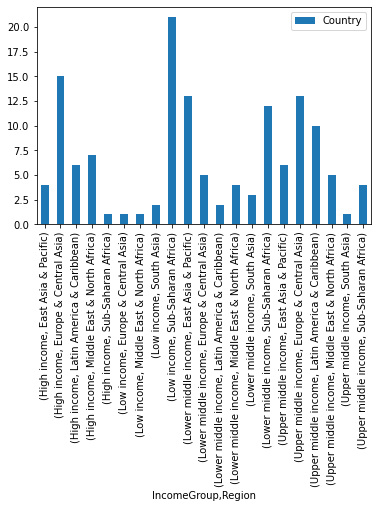

In [121]:
# Sorted by income groups, subdivided by region
bri_df.groupby(['IncomeGroup','Region']).count().plot(kind='bar')

In [122]:
# Isolating the countries column of BRI participants to combine with atlas data
bri_countries = bri_df.drop(columns=['Region','IncomeGroup'])
# First 5 rows in the table
bri_countries.head()

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


### Uniting the two new DataFrames: ###

In [123]:
# Joining the country col from the Atlas df and the Country col 
# from the BRI df to determine BRI membership of all nations around the world
countries_mega_df = pd.concat([atlas_df, bri_countries], axis=1, sort=False)

In [124]:
# First 5 rows in the table
countries_mega_df.head()

,COUNTRY,Country
0,Afghanistan,Afghanistan
1,Albania,Albania
2,Algeria,Algeria
3,American Samoa,Angola
4,Andorra,Antigua and Barbuda


### Data Cleaning Phase: ###

In [125]:
countries_mega_df.rename(columns={'Country': 'BRI Countries'}, inplace=True)

In [126]:
countries_mega_df.rename(columns={'COUNTRY': 'Country'}, inplace=True)

In [127]:
# First 5 rows in the table with more clear and distinctive columns
countries_mega_df.head()

,Country,BRI Countries
0,Afghanistan,Afghanistan
1,Albania,Albania
2,Algeria,Algeria
3,American Samoa,Angola
4,Andorra,Antigua and Barbuda


In [128]:
# Merging into a single iterable string
stringList = ' '.join([str(item) for item in countries_mega_df['BRI Countries'].dropna(axis=0)])

In [129]:
stringList

"Afghanistan Albania Algeria Angola Antigua and Barbuda Armenia Austria* Azerbaijan Bahrain Bangladesh Barbados Belarus Benin* Bolivia Bosnia and Herzegovina Brunei Darussalam Bulgaria Burundi Cabo Verde Cambodia Cameroon Chad Chile China Cook Islands Comoros* Congo, Rep.* Costa Rica Côte d'Ivoire Croatia Cuba Cyprus Czech Republic Djibouti Dominica* Ecuador Egypt, Arab Rep. El Salvador Equatorial Guinea Estonia Ethiopia Fiji Gabon Gambia, The Georgia Ghana Greece Grenada Guinea Guyana Hungary Indonesia Iran, Islamic Rep. Iraq Italy Jamaica Kazakhstan Kenya Kiribati Korea, Rep. Kuwait Kyrgyz Republic Lao PDR Latvia Lebanon Lesotho Liberia Libya Lithuania Luxembourg Madagascar Malaysia Maldives Mali Malta Mauritania Micronesia, Fed. Sts. Moldova Mongolia Montenegro Morocco Mozambique Myanmar Namibia Nepal New Zealand Niger* Nigeria Niue North Macedonia Oman Pakistan Panama Papua New Guinea Peru Philippines Poland Portugal Qatar Romania Russian Federation* Rwanda Samoa Saudi Arabia Seneg

In [130]:
# Attempt to distinguish countries on the list of BRI subscribers and Countries not on the BRI list
#def separate(string, list)
temp = []
for i in countries_mega_df['Country']:
    if (i in stringList):
        print(i)
        print(' Was on the list')
    else:
        # isolating the countries that are not BRI participants into temp
        temp.append(i)
        print(i)
        print(' Was not in the list')
        continue

Afghanistan
 Was on the list
Albania
 Was on the list
Algeria
 Was on the list
American Samoa
 Was not in the list
Andorra
 Was not in the list
Angola
 Was on the list
Anguilla
 Was not in the list
Antarctica
 Was not in the list
Antigua and Barbuda
 Was on the list
Argentina
 Was not in the list
Armenia
 Was on the list
Aruba
 Was not in the list
Australia
 Was not in the list
Austria
 Was on the list
Azerbaijan
 Was on the list
Bahamas
 Was not in the list
Bahrain
 Was on the list
Bangladesh
 Was on the list
Barbados
 Was on the list
Belarus
 Was on the list
Belgium
 Was not in the list
Belize
 Was not in the list
Benin
 Was on the list
Bermuda
 Was not in the list
Bhutan
 Was not in the list
Bolivia
 Was on the list
Bonaire
 Was not in the list
Bosnia and Herzegovina
 Was on the list
Botswana
 Was not in the list
Bouvet Island
 Was not in the list
Brazil
 Was not in the list
British Indian Ocean Territory
 Was not in the list
Brunei Darussalam
 Was on the list
Bulgaria
 Was on the l

In [131]:
countries_mega_df['Non-BRI Countries'] = pd.Series(temp)

In [132]:
# First 5 rows in the table
countries_mega_df.head()

,Country,BRI Countries,Non-BRI Countries
0,Afghanistan,Afghanistan,American Samoa
1,Albania,Albania,Andorra
2,Algeria,Algeria,Anguilla
3,American Samoa,Angola,Antarctica
4,Andorra,Antigua and Barbuda,Argentina


In [133]:
# Assigning a numeric BRI status indicator:
# (Subscribers and Non-Subscribers)
status = []
for country in countries_mega_df['Country']:
    if country in stringList:
        status.append(1)
    else:
        status.append(0)
countries_mega_df['BRI Status'] = status

In [134]:
countries_mega_df.head()

,Country,BRI Countries,Non-BRI Countries,BRI Status
0,Afghanistan,Afghanistan,American Samoa,1
1,Albania,Albania,Andorra,1
2,Algeria,Algeria,Anguilla,1
3,American Samoa,Angola,Antarctica,0
4,Andorra,Antigua and Barbuda,Argentina,0


In [135]:
# Map of Countries according to thier membership status in the Belt and road Initiative as of April 19, 2019
import plotly.express as px

geo_df = countries_mega_df
fig = px.choropleth(geo_df, locations="Country",
                    color="BRI Status", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    locationmode='country names')

fig.update_layout(title_text='2019 Belt and Road Intitiative Subscriber Nations')
fig.show()

### Third Serving of Soup GDP - 2017: ###

In [136]:
gdp_result = requests.get("https://www.worldometers.info/gdp/gdp-by-country/")
gdp_src = gdp_result.content
gdp_soup = BeautifulSoup(gdp_src, 'lxml')
gdp_tables = gdp_soup.find_all("table")

In [137]:
# From HTML Tables to DataFrame: Nominal GDP for 2017
gdp_df = pd.read_html(str(gdp_tables), header=0)[0]
# First 5 rows in the table
gdp_df.head()

,#,Country,"GDP (nominal, 2017)",GDP (abbrev.),GDP growth,Population (2017),GDP per capita,Share of World GDP
0,1,United States,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756,"$59,939",24.08%
1,2,China,"$12,237,700,479,375",$12.238 trillion,6.90%,1421021791,"$8,612",15.12%
2,3,Japan,"$4,872,415,104,315",$4.872 trillion,1.71%,127502725,"$38,214",6.02%
3,4,Germany,"$3,693,204,332,230",$3.693 trillion,2.22%,82658409,"$44,680",4.56%
4,5,India,"$2,650,725,335,364",$2.651 trillion,6.68%,1338676785,"$1,980",3.28%


In [138]:
bri_df0 = bri_df.set_index('Country')
gdp_df0 = gdp_df.set_index('Country')

In [139]:
bri_gdp_df = gdp_df0.join(other=[bri_df0])

In [140]:
bri_gdp_df.head()

,#,"GDP (nominal, 2017)",GDP (abbrev.),GDP growth,Population (2017),GDP per capita,Share of World GDP,Region,IncomeGroup
Country,,,,,,,,,
United States,1.0,"$19,485,394,000,000",$19.485 trillion,2.27%,3.250848e+08,"$59,939",24.08%,NaN,NaN
China,2.0,"$12,237,700,479,375",$12.238 trillion,6.90%,1.421022e+09,"$8,612",15.12%,East Asia & Pacific,Upper middle income
Japan,3.0,"$4,872,415,104,315",$4.872 trillion,1.71%,1.275027e+08,"$38,214",6.02%,NaN,NaN
Germany,4.0,"$3,693,204,332,230",$3.693 trillion,2.22%,8.265841e+07,"$44,680",4.56%,NaN,NaN
India,5.0,"$2,650,725,335,364",$2.651 trillion,6.68%,1.338677e+09,"$1,980",3.28%,NaN,NaN


In [141]:
bri_gdp_df = bri_gdp_df.dropna(axis=0)
bri_gdp_df.head()

,#,"GDP (nominal, 2017)",GDP (abbrev.),GDP growth,Population (2017),GDP per capita,Share of World GDP,Region,IncomeGroup
Country,,,,,,,,,
China,2.0,"$12,237,700,479,375",$12.238 trillion,6.90%,1.421022e+09,"$8,612",15.12%,East Asia & Pacific,Upper middle income
Italy,9.0,"$1,943,835,376,342",$1.944 trillion,1.50%,6.067370e+07,"$32,038",2.40%,Europe & Central Asia,High income
Indonesia,16.0,"$1,015,420,587,285",$1.015 trillion,5.07%,2.646510e+08,"$3,837",1.25%,East Asia & Pacific,Lower middle income
Turkey,17.0,"$851,549,299,635",$852 billion,7.44%,8.111645e+07,"$10,498",1.05%,Europe & Central Asia,Upper middle income
Saudi Arabia,19.0,"$686,738,400,000",$687 billion,-0.86%,3.310118e+07,"$20,747",0.85%,Middle East & North Africa,High income


In [142]:
bri_gdp_df1 = bri_gdp_df.drop(columns=['#','GDP (nominal, 2017)','GDP growth','Population (2017)','IncomeGroup','GDP (abbrev.)','GDP per capita'])

<AxesSubplot:xlabel='Region'>

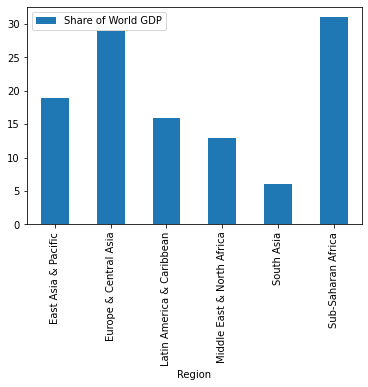

In [143]:
bri_gdp_df1.groupby(['Region']).count().plot(kind='bar')

### Fourth Serving of Soup GDP - 2019: ###

In [144]:
# Estimated Projections of World GDP for 2019

gdp_2019_result = requests.get("http://www.statisticstimes.com/economy/gdp-indicators-2019.php")
gdp_2019_src = gdp_2019_result.content
gdp_2019_soup = BeautifulSoup(gdp_2019_src, 'lxml')
gdp_2019_tables = gdp_2019_soup.find_all("table")

In [145]:
# From HTML Tables to DataFrame: Estimated GDP for 2019
gdp_2019_df = pd.read_html(str(gdp_2019_tables), header=1)[1]
gdp_2019_df.head()

,Country/Economy,Nominal,Rank,PPP,Rank.1,Nominal.1,Rank.2,PPP.1,Rank.3,2019,Rank.4
0,Pakistan,298.310,43,1219.720,25,1457,156,5958,140,4.005,74
1,Somalia,7.822,147,22.794,144,-,-,-,-,3.500,95
2,Afghanistan,21.074,115,76.491,104,577,183,2095,176,3.024,120
3,Albania,15.635,123,40.586,121,5448,102,14143,97,3.719,81
4,Algeria,200.171,55,693.109,36,4646,109,16086,88,2.708,131


In [146]:
# Data Cleaning - drop rows with null values
gdp_2019_df.dropna(inplace=True)

In [147]:
# Data Cleaning - drop column with "-" values
gdp_2019_df.drop(gdp_2019_df.index[[193]], inplace=True)

In [148]:
gdp_2019_df.rename(columns={'2019': 'GDP Growth (%) 2019'}, inplace=True)

In [149]:
gdp_2019_df.rename(columns={'Nominal': 'Estimated Nominal GDP 2019'}, inplace=True)

In [150]:
gdp_2019_df.rename(columns={'Rank': 'GDP Rank'}, inplace=True)

In [151]:
gdp_2019_df.head()

,Country/Economy,Estimated Nominal GDP 2019,GDP Rank,PPP,Rank.1,Nominal.1,Rank.2,PPP.1,Rank.3,GDP Growth (%) 2019,Rank.4
0,Pakistan,298.310,43,1219.720,25,1457,156,5958,140,4.005,74
1,Somalia,7.822,147,22.794,144,-,-,-,-,3.500,95
2,Afghanistan,21.074,115,76.491,104,577,183,2095,176,3.024,120
3,Albania,15.635,123,40.586,121,5448,102,14143,97,3.719,81
4,Algeria,200.171,55,693.109,36,4646,109,16086,88,2.708,131


In [152]:
# Re-assigning according to Rank
gdp_2019_df.index =[int(x) for x in gdp_2019_df['GDP Rank']]

In [153]:
gdp_2019_df.index

Int64Index([ 43, 147, 115, 123,  55,  62, 175,  30, 134, 166,
            ...
              7,   1,  77,  86, 181,  68,  46, 101, 108, 113],
           dtype='int64', length=193)

In [154]:
gdp_2019_df.head()

,Country/Economy,Estimated Nominal GDP 2019,GDP Rank,PPP,Rank.1,Nominal.1,Rank.2,PPP.1,Rank.3,GDP Growth (%) 2019,Rank.4
43,Pakistan,298.310,43,1219.720,25,1457,156,5958,140,4.005,74
147,Somalia,7.822,147,22.794,144,-,-,-,-,3.500,95
115,Afghanistan,21.074,115,76.491,104,577,183,2095,176,3.024,120
123,Albania,15.635,123,40.586,121,5448,102,14143,97,3.719,81
55,Algeria,200.171,55,693.109,36,4646,109,16086,88,2.708,131


In [155]:
# Sorting new rank index
gdp_2019_df.sort_index(inplace=True)

In [156]:
# Eliminiating uneccessary columns
gdp_2019_df.drop(columns=['PPP','Rank.1','Nominal.1','Rank.2','PPP.1', 'Rank.3','Rank.4'], inplace=True)

In [157]:
#gdp_2019_df.reset_index()
gdp_2019_df.head()

,Country/Economy,Estimated Nominal GDP 2019,GDP Rank,GDP Growth (%) 2019
1,United States,21482.410,1,2.541
2,China,14172.200,2,6.176
3,Japan,5220.570,3,0.943
4,Germany,4117.070,4,1.858
5,India,2957.720,5,7.436


### Mapping the Global GDP for 2019###

In [158]:
gdp_2019_df.describe()

,Country/Economy,Estimated Nominal GDP 2019,GDP Rank,GDP Growth (%) 2019
count,193,193,193,193
unique,193,193,193,179
top,Sierra Leone,0.745,55,5.000
freq,1,1,1,4


In [159]:
for col in gdp_2019_df:
    print(type(col))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [160]:
gdp_2019_df[['Estimated Nominal GDP 2019', 'GDP Rank', 'GDP Growth (%) 2019']] = gdp_2019_df[['Estimated Nominal GDP 2019', 'GDP Rank', 'GDP Growth (%) 2019']].apply(pd.to_numeric)

<AxesSubplot:>

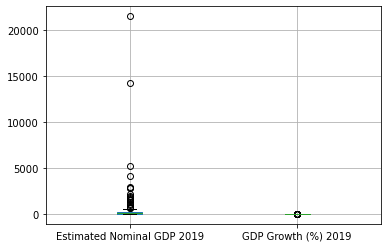

In [161]:
# Two major Outliers: USA and China
gdp_2019_df.boxplot(column=['Estimated Nominal GDP 2019','GDP Growth (%) 2019'])

In [162]:
# Map of Countries according to thier Estimated GDP for 2019
import plotly.express as px

geo_df = gdp_2019_df

fig = px.choropleth(geo_df, locations="Country/Economy",
                    color="Estimated Nominal GDP 2019",
                    #range_color=(0,21500.000),# add a scale/color scheme
                    hover_name="GDP Growth (%) 2019",
                    color_continuous_scale='Inferno',# column to add to hover information
                    locationmode='country names')

fig.update_layout(title_text='2019 Estimated Global GDP')
fig.show()

### Global Threats and Final Conclusions ###

In [163]:
# Hand-Crafted Excel Document of 30 lowest rated countries on the Global Surveillance Index
AI_df = pd.read_excel('data/Top 30 A.I. Global Surveillance Index Worst Offenders.xlsx')
# Credit to Stven Feldman and his team for gathering the data and making it public
# Data Source: https://carnegieendowment.org/2019/09/17/global-expansion-of-ai-surveillance-pub-79847

In [164]:
# Scores of Bolivia and Mexico were added for the sake of compatibility, these two are not amongst the top 30
AI_df.head()

,Country,Agg. AIGS Score,(BRI) Participant,Types of AI Surveillance,Powered by Chinese Tech,Powered by American Tech
0,Saudi Arabia,0.97,1,3,1,1
1,Tajikistan,1.52,1,2,1,0
2,Uzbekistan,1.65,1,2,1,0
3,Bahrain,1.72,1,2,1,0
4,China,1.77,1,3,1,1


In [165]:
### Types of Surveillance refers to the use of:
# 1) Facial Recognition, 
# 2) Smart Cities/Safe City Tech and 
# 3) Smart Policing/Predictive Policing###
'''These Technologies all have tremendous potential to be used for good or ill purposes. 
Utilization of this technology does not on its own indicate abuse, however taken in 
consideration with other factors it may be be indicative of a substantial risk of abuse.'''

### Agg. AIGS Score refers to a weighted aggregate score that takes into consideration 
# a country's rank placement on the following indeces:
# 2018 Freedom in the World Index, 
# 2018 EIU Democracy Index,
# And the V-Dem Electoral Democracy Index

'''More Information can be found at:
    https://carnegieendowment.org/2019/09/17/global-expansion-of-ai-surveillance-pub-79847'''

'More Information can be found at:\n    https://carnegieendowment.org/2019/09/17/global-expansion-of-ai-surveillance-pub-79847'

In [166]:
# Correlation Matrix of all data attributes and how they relate to one another
corr_mat = AI_df.corr()
corr_mat

,Agg. AIGS Score,(BRI) Participant,Types of AI Surveillance,Powered by Chinese Tech,Powered by American Tech
Agg. AIGS Score,1.000000,-0.351355,0.015541,0.080290,-0.250020
(BRI) Participant,-0.351355,1.000000,0.408653,-0.111111,0.104447
Types of AI Surveillance,0.015541,0.408653,1.000000,-0.078731,0.393539
Powered by Chinese Tech,0.080290,-0.111111,-0.078731,1.000000,-0.104447
Powered by American Tech,-0.250020,0.104447,0.393539,-0.104447,1.000000


<AxesSubplot:>

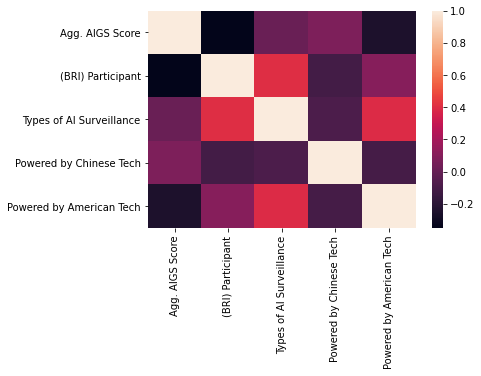

In [167]:
'''A Value of one indicates perfect correlation, 
a value of 0 refers to a complete lack of a relationship, 
and a negative value indicates an inverse relationship.'''
sns.heatmap(corr_mat)

In [168]:
#Source: https://worldjusticeproject.org/our-work/research-and-data/wjp-rule-law-index-2019
ROL_df = pd.read_excel('data/Rule of Law Index 30 Worst Offenders.xlsx')

In [169]:
ROL_df.head()

,2016,2017 - 2018,2019
0,Venezuela,Venezuela,Venezuela
1,Cambodia,Cambodia,Cambodia
2,Afghanistan,Afghanistan,Congo
3,Egypt,Egypt,Afghanistan
4,Cameroon,Cameroon,Mauritania


In [170]:
# Top 30 Rule of Law offender Nations of 2019
ROL_df['Top 30 RoL Offendor Status'] = [1 for num in range(0,len(ROL_df[2019]))]

In [171]:
ROL_df.drop(columns=[2016,'2017 - 2018'], inplace=True)

In [172]:
ROL_df.head()

,2019,Top 30 RoL Offendor Status
0,Venezuela,1
1,Cambodia,1
2,Congo,1
3,Afghanistan,1
4,Mauritania,1


### Cleaning Data for BRI Nations ###

In [173]:
'''Of the 138 alleged BRI nations, the membership status of 7 countries is currently disputed. 
These nations have neither confirmed nor denied claims of having signed a Memorandum of Understanding, 
which is indicative of thier agreement to Join in the One Belt, One Road Initiative, also known as the
Belt and Road Initiative (BRI). These Nations are identified in the list of 138 countries by an '*' 
symbol the right-hand side of thier Country Names. These disputed nations include: Austria, Benin, Comoros,
the Democratic Republic of Congo AKA Congo, Rep., Dominica, Niger, and The Russian Federation AKA Russia.

Note: For the sake of completeness, these 7 countries are also included.'''

"Of the 138 alleged BRI nations, the membership status of 7 countries is currently disputed. \nThese nations have neither confirmed nor denied claims of having signed a Memorandum of Understanding, \nwhich is indicative of thier agreement to Join in the One Belt, One Road Initiative, also known as the\nBelt and Road Initiative (BRI). These Nations are identified in the list of 138 countries by an '*' \nsymbol the right-hand side of thier Country Names. These disputed nations include: Austria, Benin, Comoros,\nthe Democratic Republic of Congo AKA Congo, Rep., Dominica, Niger, and The Russian Federation AKA Russia.\n\nNote: For the sake of completeness, these 7 countries are also included."

In [174]:
# Changing 'Venezuela, RB' to 'Venezuela' to match values in other tables
bri_df['Country'][133] = 'Venezuela'
bri_df['Country'][133]

'Venezuela'

In [175]:
# Changing 'Congo, Rep' to 'Congo' to match values in other tables
bri_df['Country'][26] = 'Congo'
bri_df['Country'][26]

'Congo'

In [176]:
# First Measure => Including disputed Nations; index values 6, 12, 25, 26, 34, 86, 100
# Eliminate Trailing '*' in bri_df['Country']
bri_df1 = bri_df
bri_df1['Country'][6] = bri_df1['Country'][6].rstrip('*')
bri_df1['Country'][12] = bri_df1['Country'][12].rstrip('*')
bri_df1['Country'][25] = bri_df1['Country'][25].rstrip('*')
bri_df1['Country'][26] = bri_df1['Country'][26].rstrip('*')
bri_df1['Country'][34] = bri_df1['Country'][34].rstrip('*')
bri_df1['Country'][86] = bri_df1['Country'][86].rstrip('*')
bri_df1['Country'][100] = bri_df1['Country'][100].rstrip('*')
bri_df1.head(15)

,Country,Region,IncomeGroup
0,Afghanistan,South Asia,Low income
1,Albania,Europe & Central Asia,Upper middle income
2,Algeria,Middle East & North Africa,Upper middle income
3,Angola,Sub-Saharan Africa,Lower middle income
4,Antigua and Barbuda,Latin America & Caribbean,High income
5,Armenia,Europe & Central Asia,Upper middle income
6,Austria,Europe & Central Asia,High income
7,Azerbaijan,Europe & Central Asia,Upper middle income
8,Bahrain,Middle East & North Africa,High income
9,Bangladesh,South Asia,Lower middle income


In [177]:
# Preparing the join-keys for the table Join
ROL_df.rename(columns={2019: 'Country'}, inplace=True)
#  AI_df already has column 'Country'
# bri_df already has column 'Country'
gdp_2019_df.rename(columns={'Country/Economy': 'Country'}, inplace=True)

In [178]:
# Changing 'Republic of Congo' to 'Congo' to match values in other tables
gdp_2019_df['Country'][26] = 'Congo'
gdp_2019_df['Country'][26]

<ipython-input-178-132f44e601bb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'Congo'

In [179]:
# Set Country to Index for Joining (Join only allowed on index)
ROL_df1 = ROL_df.set_index('Country')
AI_df1 = AI_df.set_index('Country')
bri_df2 = bri_df1.set_index('Country')
gdp_2019_df1 = gdp_2019_df.set_index('Country')
ROL_df1.head()

,Top 30 RoL Offendor Status
Country,
Venezuela,1
Cambodia,1
Congo,1
Afghanistan,1
Mauritania,1


In [180]:
# Save for After Prep Work is done:
Final_df1 = ROL_df1.join(other=[AI_df1, bri_df2, gdp_2019_df1])

In [181]:
Final_df1

,Top 30 RoL Offendor Status,Agg. AIGS Score,(BRI) Participant,Types of AI Surveillance,Powered by Chinese Tech,Powered by American Tech,Region,IncomeGroup,Estimated Nominal GDP 2019,GDP Rank,GDP Growth (%) 2019
Country,,,,,,,,,,,
Venezuela,1.0,2.49,1.0,1.0,1.0,0.0,Latin America & Caribbean,Upper middle income,87.010,68.0,-5.000
Cambodia,1.0,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific,Lower middle income,26.372,107.0,6.778
Congo,1.0,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income,469.661,26.0,2.150
Afghanistan,1.0,NaN,NaN,NaN,NaN,NaN,South Asia,Low income,21.074,115.0,3.024
Mauritania,1.0,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income,5.243,154.0,5.237
Egypt,1.0,2.56,1.0,3.0,1.0,1.0,NaN,NaN,298.153,44.0,5.464
Cameroon,1.0,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income,40.125,98.0,4.401
Bolivia,1.0,6.27,1.0,3.0,1.0,0.0,Latin America & Caribbean,Lower middle income,45.045,93.0,4.200
Ethiopia,1.0,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Low income,88.170,67.0,8.494


In [182]:
# Filling Null Values with the average of the corresponding column
Final_df1['Agg. AIGS Score'].fillna(value=Final_df1['Agg. AIGS Score'].mean(), inplace=True)
Final_df1['(BRI) Participant'].fillna(value=1.0, inplace=True) # All in BRI 138 list except for Honduras and Nicaragua; 
# Niger is the only country amongst the disputed 7 that is included in this set
Final_df1['Types of AI Surveillance'].fillna(value=Final_df1['Types of AI Surveillance'].mean(), inplace=True)
Final_df1['Powered by Chinese Tech'].fillna(value=0.5, inplace=True) # Not confirmed one way or another so 50/50 chance of 1 or 0
Final_df1['Powered by American Tech'].fillna(value=0.5, inplace=True) # Not confirmed one way or another so 50/50 chance of 1 or 0

In [183]:
Final_df1['(BRI) Participant'][12] = 0 # Honduras
Final_df1['(BRI) Participant'][12] = 0 # Nicaragua

<ipython-input-183-978a99647e35>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-183-978a99647e35>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [184]:
Final_df1

,Top 30 RoL Offendor Status,Agg. AIGS Score,(BRI) Participant,Types of AI Surveillance,Powered by Chinese Tech,Powered by American Tech,Region,IncomeGroup,Estimated Nominal GDP 2019,GDP Rank,GDP Growth (%) 2019
Country,,,,,,,,,,,
Venezuela,1.0,2.490000,1.0,1.000000,1.0,0.0,Latin America & Caribbean,Upper middle income,87.010,68.0,-5.000
Cambodia,1.0,4.093077,1.0,2.384615,0.5,0.5,East Asia & Pacific,Lower middle income,26.372,107.0,6.778
Congo,1.0,4.093077,1.0,2.384615,0.5,0.5,Sub-Saharan Africa,Lower middle income,469.661,26.0,2.150
Afghanistan,1.0,4.093077,1.0,2.384615,0.5,0.5,South Asia,Low income,21.074,115.0,3.024
Mauritania,1.0,4.093077,1.0,2.384615,0.5,0.5,Sub-Saharan Africa,Lower middle income,5.243,154.0,5.237
Egypt,1.0,2.560000,1.0,3.000000,1.0,1.0,NaN,NaN,298.153,44.0,5.464
Cameroon,1.0,4.093077,1.0,2.384615,0.5,0.5,Sub-Saharan Africa,Lower middle income,40.125,98.0,4.401
Bolivia,1.0,6.270000,1.0,3.000000,1.0,0.0,Latin America & Caribbean,Lower middle income,45.045,93.0,4.200
Ethiopia,1.0,4.093077,1.0,2.384615,0.5,0.5,Sub-Saharan Africa,Low income,88.170,67.0,8.494


In [185]:
Final1_matrix = Final_df1.corr()

<AxesSubplot:>

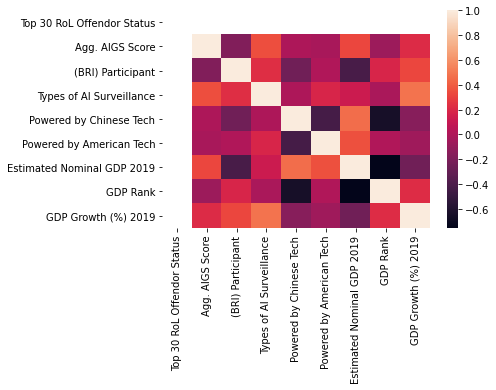

In [186]:
sns.heatmap(Final1_matrix)

### Findings: ###

In [187]:
#Amongst the 30 Worst Offendors on the Rule of Law Index, the following seem to be inversely correlated:
'''
High value in one relates to low value in the other:
    GDP Rank vs Estimated Nominal GDP for 2019, -> 'Smaller' Rank No. AKA Higher Ranked Countries have a larger Nominal GDP
    GDP Rank vs Powered by Chinese Tech, -> Aside from a sizable handful of lower-income countries in Sub-Saharan Africa, 
                                            Chinese Tech is most prevelant in countries that are high-ranked in terms of GDP
    BRI Participation vs Estimated Nominal GDP 2019, -> Again, China Powering mostly low-income countries
    Powered by Chinese Tech vs Powered by American Tech, -> Most countries select one or the other but there is overlap
    BRI Participation vs Agg. AIGS Score, -> BRI Participants are likely to have a lower score, indicating abuse of AI
'''
#Amongst the 30 Worst Offendors on the Rule of Law Index, the following seem to be directly correlated:
'''
High value in one relates to high value in the other:
    GDP Growth vs Types of Surveillance, -> Rising countries are investing more heavily in Surveillance Tech
    GDP Growth vs BRI Participation, -> BRI participant nations are experiencing higher GDP growth rates in terms of %
    Estimated Nominal GDP 2019 vs Powered by American Tech, -> High Income Nations are likely to buy American Tech
    Estimated Nominal GDP 2019 vs Powered by Chinese Tech, -> High Income Nations are even more likely to buy Chinese Tech
    Types of Surveillance vs Agg. AIGS Score, -> Nations with more variety of surveillance measures have slightly higher scores
'''

'\nHigh value in one relates to high value in the other:\n    GDP Growth vs Types of Surveillance, -> Rising countries are investing more heavily in Surveillance Tech\n    GDP Growth vs BRI Participation, -> BRI participant nations are experiencing higher GDP growth rates in terms of %\n    Estimated Nominal GDP 2019 vs Powered by American Tech, -> High Income Nations are likely to buy American Tech\n    Estimated Nominal GDP 2019 vs Powered by Chinese Tech, -> High Income Nations are even more likely to buy Chinese Tech\n    Types of Surveillance vs Agg. AIGS Score, -> Nations with more variety of surveillance measures have slightly higher scores\n'

In [188]:
# 30 Lowest rated countries on the Artificial Intelligence Global Surveillance (AIGS) Index
# Indicative of greatest levels of abuse of AI tech
Final_df2 = AI_df1.join(other=[bri_df2, gdp_2019_df1])

In [189]:
Final_df2

,Agg. AIGS Score,(BRI) Participant,Types of AI Surveillance,Powered by Chinese Tech,Powered by American Tech,Region,IncomeGroup,Estimated Nominal GDP 2019,GDP Rank,GDP Growth (%) 2019
Country,,,,,,,,,,
Saudi Arabia,0.97,1.0,3.0,1.0,1.0,Middle East & North Africa,High income,795.582,18.0,2.428
Tajikistan,1.52,1.0,2.0,1.0,0.0,Europe & Central Asia,Low income,7.577,149.0,5.000
Uzbekistan,1.65,1.0,2.0,1.0,0.0,Europe & Central Asia,Lower middle income,51.339,86.0,5.000
Bahrain,1.72,1.0,2.0,1.0,0.0,Middle East & North Africa,High income,41.607,97.0,2.585
China,1.77,1.0,3.0,1.0,1.0,East Asia & Pacific,Upper middle income,14172.200,2.0,6.176
United Arab Emirates,1.87,1.0,3.0,1.0,1.0,Middle East & North Africa,High income,455.587,27.0,3.662
Qatar,2.21,1.0,3.0,0.0,0.0,Middle East & North Africa,High income,204.306,54.0,2.816
Oman,2.41,1.0,2.0,1.0,1.0,Middle East & North Africa,High income,86.525,69.0,5.045
Laos,2.46,1.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [190]:
Final2_matrix = Final_df2.corr()

<AxesSubplot:>

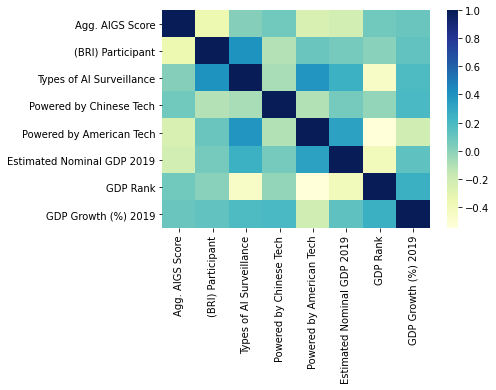

In [191]:
sns.heatmap(Final2_matrix, cmap="YlGnBu")

In [192]:
#Amongst the 30 Worst Offendors on the AI Global Surveillance Index, the following seem to be inversely correlated:
'''
High value in one relates to low value in the other:
    BRI Participant vs Agg. AIGS Score, 
    GDP Rank vs Types of Surveillance, -> 'Smaller' Rank AKA Higher Ranked Nations have a larger variety of Surveillance measures
    GDP Rank vs Powered by American Tech, -> 'Smaller' Rank AKA Higher Ranked Nations are likely to be Powered by American Tech
    GDP Rank vs Estimated Nominal GDP 2019, -> 'Smaller' Rank AKA Higher Ranked Nations have a larger estimated Nominal GDP
    GDP Growth vs Powered by American Tech -> Countries Experiencing higher Growth Rates are more likely to have purchased American Tech
'''
#Amongst the 30 Worst Offendors on the AI Global Surveillance Index, the following seem to be directly correlated:
'''
High value in one relates to high value in the other:
    BRI Participation vs Types of Surveillance, -> BRI Participants are more likely to use various types of surveillance measures
    Powered by American Tech vs Types of Surveillance, -> Countries powered by American Tech are also likely to use different types of surveillance measures
    Powered by American Tech vs Estimateed Nominal GDP 2019, -> Nations with High GDP are likely to buy American Tech
    GDP Rank vs GDP Growth, -> 'Larger' Rank AKA Low Ranked Nations are experience Higher Growth rates
'''

"\nHigh value in one relates to high value in the other:\n    BRI Participation vs Types of Surveillance, -> BRI Participants are more likely to use various types of surveillance measures\n    Powered by American Tech vs Types of Surveillance, -> Countries powered by American Tech are also likely to use different types of surveillance measures\n    Powered by American Tech vs Estimateed Nominal GDP 2019, -> Nations with High GDP are likely to buy American Tech\n    GDP Rank vs GDP Growth, -> 'Larger' Rank AKA Low Ranked Nations are experience Higher Growth rates\n"